In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target
df['target_name']=df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target','target_name'],axis='columns'),iris.target,test_size=0.2)

In [25]:
len(x_train)

120

In [26]:
len(x_test)

30

In [44]:
model=RandomForestClassifier(n_estimators=80)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [45]:
model.score(x_test,y_test)

0.9666666666666667

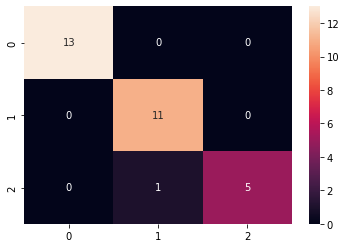

In [46]:
predicted=model.predict(x_test)
cm=confusion_matrix(predicted,y_test)
sns.heatmap(cm,annot=True)
plt.xlabel='True'
plt.ylabel='False'